In [93]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from networkx.algorithms import bipartite
from tqdm import tqdm
#df = pd.read_excel('graph_測試.xlsx')
import pickle

In [16]:
df = pd.read_excel('patent_wipo16(11-20).xlsx')
invt_ID = df['invt_ID'].unique()

In [17]:
df

,PN,pn_appd,invt_ID,assignee_ID
0,8212072,2011-01-03,fl:g_ln:padakandala-1,a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903
1,8212072,2011-01-03,fl:m_ln:divi-1,a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903
2,8212072,2011-01-03,fl:m_ln:rao-7,a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903
3,8212072,2011-01-03,fl:s_ln:kuduva-1,a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903
4,8877192,2011-01-03,fl:a_ln:mjalli-1,9b5eff9a-131c-4682-8bfd-856733f6a860
...,...,...,...,...
301184,10874614,2020-08-27,fl:p_ln:andersson-15,591903e1-f39b-4fd2-b196-98beacdd3c8c
301185,10874614,2020-08-27,fl:t_ln:meijer-2,591903e1-f39b-4fd2-b196-98beacdd3c8c
301186,10874614,2020-08-27,fl:v_ln:soderberg-1,591903e1-f39b-4fd2-b196-98beacdd3c8c
301187,10874687,2020-09-10,fl:a_ln:moussa-5,66d11775-44d9-4fcf-9a60-ce5b8a81ec90


In [18]:
import math
n = math.ceil(len(invt_ID))

In [19]:
df = df.dropna(how='all', axis=1)

In [6]:
#data is too big 拆成四個part跑(0,n),(n,2n),(2n,3n), (3n,len)
'''
inventor = []

for i in tqdm(range(len(invt_ID))):
    nodes_PN = []
    nodes_assignee = []
    edges = []
    for PN in df.loc[(df['invt_ID']==invt_ID[i])]['PN']:
        if PN not in nodes_PN:
            nodes_PN.append(PN)
    for ass_ID in df.loc[(df['invt_ID']== invt_ID[i])]['assignee_ID']:
        if ass_ID not in nodes_assignee:
            nodes_assignee.append(ass_ID)        
    for j in df.loc[(df['invt_ID']== invt_ID[i])].index:
        edges.append((df.loc[(df['invt_ID']==invt_ID[i])]['PN'][j],df.loc[(df['invt_ID']==invt_ID[i])]['assignee_ID'][j]))
    inventor.append({invt_ID[i]:{'nodes_PN':nodes_PN , 'nodes_assignee':nodes_assignee, 'edges':edges}})
'''

"\ninventor = []\n\nfor i in tqdm(range(len(invt_ID))):\n    nodes_PN = []\n    nodes_assignee = []\n    edges = []\n    for PN in df.loc[(df['invt_ID']==invt_ID[i])]['PN']:\n        if PN not in nodes_PN:\n            nodes_PN.append(PN)\n    for ass_ID in df.loc[(df['invt_ID']== invt_ID[i])]['assignee_ID']:\n        if ass_ID not in nodes_assignee:\n            nodes_assignee.append(ass_ID)        \n    for j in df.loc[(df['invt_ID']== invt_ID[i])].index:\n        edges.append((df.loc[(df['invt_ID']==invt_ID[i])]['PN'][j],df.loc[(df['invt_ID']==invt_ID[i])]['assignee_ID'][j]))\n    inventor.append({invt_ID[i]:{'nodes_PN':nodes_PN , 'nodes_assignee':nodes_assignee, 'edges':edges}})\n"

In [20]:
with open('output/invt_w16_part1.pickle', 'rb') as handle:
    a = pickle.load(handle)    
with open('output/invt_w16_part2.pickle', 'rb') as handle:
    b = pickle.load(handle)    
with open('output/invt_w16_part3.pickle', 'rb') as handle:
    c = pickle.load(handle)    
with open('output/invt_w16_part4.pickle', 'rb') as handle:
    d = pickle.load(handle)    

In [27]:
inventor = {}
inventor.update(a)
inventor.update(b)
inventor.update(c)
inventor.update(d)

In [101]:
#nx.draw_networkx(B, with_labels=True)

In [30]:
from networkx.algorithms import bipartite
def get_connected_len(nodes_PN, nodes_assignee, edges):
    B = nx.Graph()
    B.add_nodes_from(nodes_PN,bipartite=0)
    B.add_nodes_from(nodes_assignee,bipartite=1)
    B.add_edges_from(edges)
    bipartite.is_bipartite(B)
    edges = B.edges()
    #nx.draw_networkx(B,pos = nx.drawing.layout.bipartite_layout(B, nodes_PN), width = 2)
    #print(B)
    return len(list(nx.connected_components(B)))

In [31]:
disconnected = []
for key, graph in inventor.items():
    node_pn = graph['nodes_PN']
    node_ass = graph['nodes_assignee']
    edge = graph['edges']
    if len(node_ass) > 1:
        if get_connected_len(node_pn, node_ass, edge) > 1:
            #print(key)
            disconnected.append(key)

In [32]:
len(disconnected)

14881

In [94]:
disconnected

['fl:m_ln:divi-1',
 'fl:a_ln:mjalli-1',
 'fl:y_ln:tian-31',
 'fl:r_ln:samulski-2',
 'fl:g_ln:gaudernack-1',
 'fl:j_ln:eriksen-9',
 'fl:p_ln:pushko-1',
 'fl:a_ln:giori-1',
 'fl:h_ln:lopez de diego-1',
 'fl:k_ln:christensen-17',
 'fl:m_ln:rock-2',
 'fl:j_ln:collard-12',
 'fl:f_ln:cailler-1',
 'fl:d_ln:saito-3',
 'fl:e_ln:stangeland-1',
 'fl:l_ln:patterson-5',
 'fl:p_ln:van dyke-1',
 'fl:t_ln:church-7',
 'fl:g_ln:alvaro-1',
 'fl:r_ln:giovannini-1',
 'fl:c_ln:lee-352',
 'fl:b_ln:framery-1',
 'fl:s_ln:morrison-10',
 'fl:b_ln:stearns-2',
 'fl:c_ln:king-56',
 'fl:j_ln:brittain-4',
 'fl:a_ln:dalgleish-1',
 'fl:w_ln:liu-130',
 'fl:a_ln:jakobovits-1',
 'fl:m_ln:faris-1',
 'fl:s_ln:ahmed-14',
 'fl:t_ln:chowdhury-2',
 'fl:y_ln:luo-111',
 'fl:s_ln:steiner-2',
 'fl:j_ln:sachetto-1',
 'fl:r_ln:bufton-1',
 'fl:t_ln:buser-1',
 'fl:m_ln:tengler-2',
 'fl:r_ln:mcmahen-2',
 'fl:d_ln:harats-1',
 'fl:e_ln:kovalevski-ishai-1',
 'fl:g_ln:halperin-1',
 'fl:t_ln:fujino-1',
 'fl:e_ln:feinstein-3',
 'fl:s_ln:avkin

In [34]:
date = {}
for i in tqdm(range(len(df))):
    date.update({df.iloc[i,0]:df.iloc[i, 1]})

100%|███████████████████████████████████████████████████████████████████████| 301189/301189 [00:20<00:00, 15011.66it/s]


In [95]:
date

{8212072: Timestamp('2011-01-03 00:00:00'),
 8877192: Timestamp('2011-01-03 00:00:00'),
 9012224: Timestamp('2011-01-03 00:00:00'),
 8614177: Timestamp('2011-01-03 00:00:00'),
 9072818: Timestamp('2011-01-03 00:00:00'),
 9101572: Timestamp('2011-01-03 00:00:00'),
 9192636: Timestamp('2011-01-03 00:00:00'),
 8729065: Timestamp('2011-01-03 00:00:00'),
 8338503: Timestamp('2011-01-04 00:00:00'),
 8338456: Timestamp('2011-01-04 00:00:00'),
 8715651: Timestamp('2011-01-04 00:00:00'),
 8507714: Timestamp('2011-01-04 00:00:00'),
 8946181: Timestamp('2011-01-04 00:00:00'),
 8900588: Timestamp('2011-01-04 00:00:00'),
 9487582: Timestamp('2011-01-04 00:00:00'),
 8242164: Timestamp('2011-01-04 00:00:00'),
 8143306: Timestamp('2011-01-04 00:00:00'),
 8003140: Timestamp('2011-01-04 00:00:00'),
 9217032: Timestamp('2011-01-04 00:00:00'),
 8361445: Timestamp('2011-01-05 00:00:00'),
 8563692: Timestamp('2011-01-05 00:00:00'),
 9567605: Timestamp('2011-01-05 00:00:00'),
 9109227: Timestamp('2011-01-05 

[8877192, 8759535, 8853226, 8450354, 9359313, 8344120, 8329715, 8987295, 8703766, 8933222, 10030011, 9163022, 9120813, 9175003, 9393245, 9855251, 9687489, 9833457, 10064846, 10085990, 10287284, 10363244, 10364233, 10391097, 10570126, 10568888]


<IPython.core.display.Javascript object>


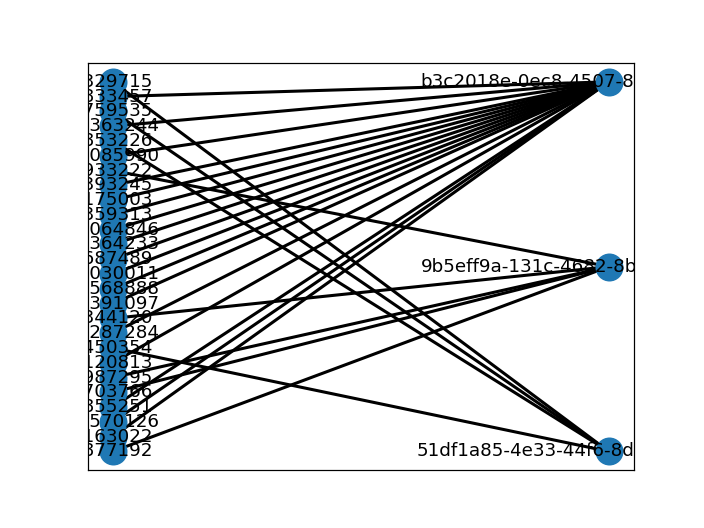

In [59]:
print(inventor[disconnected[1]]['nodes_PN'])


A = nx.Graph()
A.add_nodes_from(inventor[disconnected[1]]['nodes_PN'],bipartite=0)
A.add_nodes_from(inventor[disconnected[1]]['nodes_assignee'],bipartite=1)
A.add_edges_from(inventor[disconnected[1]]['edges'])
bipartite.is_bipartite(A)
edges = A.edges()
nx.draw_networkx(A,pos = nx.drawing.layout.bipartite_layout(A, inventor[disconnected[1]]['nodes_PN']), width = 2)

In [99]:
A1 = sorted(nx.connected_components(A), key = len, reverse = True)
print(type(A1[0]))
print('disconnected[1] graphs:',A1)
print(A1[0])

<class 'set'>
disconnected[1] graphs: [{9687489, 10030011, 10085990, 10364233, 'b3c2018e-0ec8-4507-8c2f-99ccf7e1c93e', 10363244, 9120813, 9163022, 10064846, 10570126, 9359313, 9833457, 9855251, 10287284, 10568888, 10391097, 9175003, 9393245}, {'9b5eff9a-131c-4682-8bfd-856733f6a860', 8933222, 8877192, 8703766, 8344120, 8987295}, {8853226, 8759535, 8450354, 8329715, '51df1a85-4e33-44f6-8d64-078dd2e2c793'}]
{9687489, 10030011, 10085990, 10364233, 'b3c2018e-0ec8-4507-8c2f-99ccf7e1c93e', 10363244, 9120813, 9163022, 10064846, 10570126, 9359313, 9833457, 9855251, 10287284, 10568888, 10391097, 9175003, 9393245}


<IPython.core.display.Javascript object>


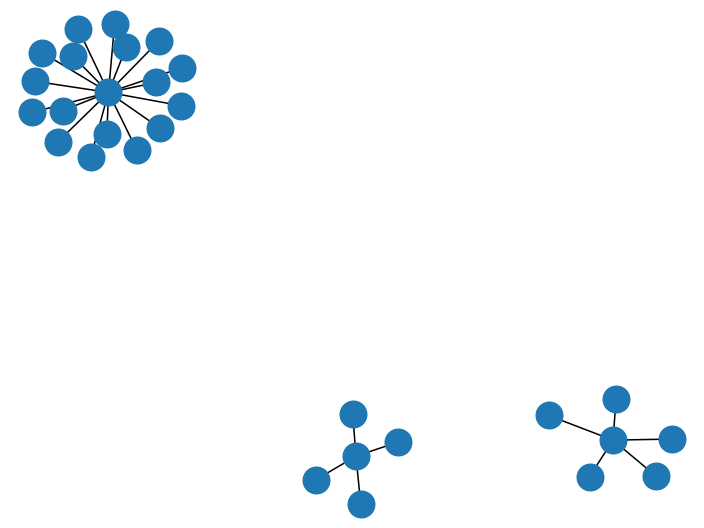

In [107]:
nx.draw(A)

In [92]:
for i in A1[0]:
    print(type(i))
    if type(i) != str:

<class 'numpy.int64'>
9687489
<class 'numpy.int64'>
10030011
<class 'numpy.int64'>
10085990
<class 'numpy.int64'>
10364233
<class 'str'>
<class 'numpy.int64'>
10363244
<class 'numpy.int64'>
9120813
<class 'numpy.int64'>
9163022
<class 'numpy.int64'>
10064846
<class 'numpy.int64'>
10570126
<class 'int'>
9359313
<class 'numpy.int64'>
9833457
<class 'numpy.int64'>
9855251
<class 'numpy.int64'>
10287284
<class 'numpy.int64'>
10568888
<class 'numpy.int64'>
10391097
<class 'numpy.int64'>
9175003
<class 'numpy.int64'>
9393245


In [81]:
min(date.values())

Timestamp('2011-01-03 00:00:00')

In [33]:
disconnected

['fl:m_ln:divi-1',
 'fl:a_ln:mjalli-1',
 'fl:y_ln:tian-31',
 'fl:r_ln:samulski-2',
 'fl:g_ln:gaudernack-1',
 'fl:j_ln:eriksen-9',
 'fl:p_ln:pushko-1',
 'fl:a_ln:giori-1',
 'fl:h_ln:lopez de diego-1',
 'fl:k_ln:christensen-17',
 'fl:m_ln:rock-2',
 'fl:j_ln:collard-12',
 'fl:f_ln:cailler-1',
 'fl:d_ln:saito-3',
 'fl:e_ln:stangeland-1',
 'fl:l_ln:patterson-5',
 'fl:p_ln:van dyke-1',
 'fl:t_ln:church-7',
 'fl:g_ln:alvaro-1',
 'fl:r_ln:giovannini-1',
 'fl:c_ln:lee-352',
 'fl:b_ln:framery-1',
 'fl:s_ln:morrison-10',
 'fl:b_ln:stearns-2',
 'fl:c_ln:king-56',
 'fl:j_ln:brittain-4',
 'fl:a_ln:dalgleish-1',
 'fl:w_ln:liu-130',
 'fl:a_ln:jakobovits-1',
 'fl:m_ln:faris-1',
 'fl:s_ln:ahmed-14',
 'fl:t_ln:chowdhury-2',
 'fl:y_ln:luo-111',
 'fl:s_ln:steiner-2',
 'fl:j_ln:sachetto-1',
 'fl:r_ln:bufton-1',
 'fl:t_ln:buser-1',
 'fl:m_ln:tengler-2',
 'fl:r_ln:mcmahen-2',
 'fl:d_ln:harats-1',
 'fl:e_ln:kovalevski-ishai-1',
 'fl:g_ln:halperin-1',
 'fl:t_ln:fujino-1',
 'fl:e_ln:feinstein-3',
 'fl:s_ln:avkin